## Exploratory Data Analysis

### Read in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../data/Smaller Dataset - Data Wrangling.csv', index_col = 0, parse_dates = True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7255968 entries, 2015-09-05 13:30:00 to 2020-12-27 12:13:00
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ID            int64  
 1   IUCR          object 
 2   Primary Type  object 
 3   Description   object 
 4   Arrest        bool   
 5   Domestic      bool   
 6   Latitude      float64
 7   Longitude     float64
dtypes: bool(2), float64(2), int64(1), object(3)
memory usage: 401.4+ MB


In [4]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
df.index.to_series().min()

Timestamp('2001-01-01 00:00:00')

In [6]:
df.index.to_series().max()

Timestamp('2020-12-27 23:59:00')

In [7]:
# This is how many crimes resulted in arrest
df[df['Arrest']]['Arrest'].count()

1970069

In [8]:
# This is how many crimes were domestic
df[df['Domestic']]['Domestic'].count()

974228

### Group Data 

In [9]:
df.head()

,ID,IUCR,Primary Type,Description,Arrest,Domestic,Latitude,Longitude
Date,,,,,,,,
2015-09-05 13:30:00,10224738,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,41.815117,-87.670000
2015-09-04 11:30:00,10224739,0870,THEFT,POCKET-PICKING,False,False,41.895080,-87.765400
2018-09-01 00:01:00,11646166,0810,THEFT,OVER $500,False,True,NaN,NaN
2015-09-05 12:45:00,10224740,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),True,False,41.937406,-87.716650
2015-09-05 13:00:00,10224741,0560,ASSAULT,SIMPLE,False,True,41.881903,-87.755121


#### First group by day and primary type

In [10]:
allcrimes_byday = df[['ID','Primary Type']].groupby(by=[df.index.date,'Primary Type']).count().rename(columns={'ID':'Count'})

In [11]:
allcrimes_byday = allcrimes_byday.reset_index().rename(columns={'level_0':'Date'}).set_index('Date')

In [12]:
allcrimes_byday.head()

,Primary Type,Count
Date,,
2001-01-01,ASSAULT,70
2001-01-01,BATTERY,296
2001-01-01,BURGLARY,66
2001-01-01,CRIM SEXUAL ASSAULT,38
2001-01-01,CRIMINAL DAMAGE,233


In [13]:
# Now pivot this data so we have a column for each type of crime
allcrimes_byday = allcrimes_byday.pivot(columns='Primary Type',values='Count')

In [14]:
# Replace missing values with 0's
allcrimes_byday = allcrimes_byday.fillna(0)

In [15]:
# Convert floats to ints
allcrimes_byday[list(allcrimes_byday.columns)] = allcrimes_byday[list(allcrimes_byday.columns)].astype(int)

In [16]:
allcrimes_byday.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0,70,296,66,0,38,233,2,29,92,...,167,5,0,5,0,41,65,1,413,32
2001-01-02,0,66,143,68,0,2,118,0,35,78,...,101,11,0,2,0,35,4,0,221,9
2001-01-03,1,79,165,57,0,7,136,0,35,49,...,96,16,0,7,0,51,5,1,226,7
2001-01-04,1,57,173,55,0,2,133,0,29,42,...,96,19,0,3,0,55,1,0,243,9
2001-01-05,3,68,178,55,0,6,142,0,29,53,...,90,16,0,5,0,55,2,0,265,6


In [17]:
allcrimes_byday.shape

(7301, 36)

#### Add total crimes column

In [18]:
allcrimes_byday['Total Crimes'] = allcrimes_byday.sbaum(axis=1)

In [19]:
allcrimes_byday.shape

(7301, 37)

#### Group by day counting arrests and domestics

In [21]:
arrests_domestics = df[['Arrest','Domestic']].groupby(by=[df.index.date]).sum()

In [22]:
arrests_domestics[['Arrest','Domestic']] = arrests_domestics[['Arrest','Domestic']].astype('int')

In [23]:
arrests_domestics.head()

,Arrest,Domestic
2001-01-01,399,285
2001-01-02,383,146
2001-01-03,343,162
2001-01-04,377,131
2001-01-05,415,159


In [24]:
arrests_domestics.shape

(7301, 2)

#### Merge these two dataframes

In [25]:
allcrimes_byday = allcrimes_byday.join(arrests_domestics)

In [26]:
allcrimes_byday.shape

(7301, 39)

#### Convert index back to datetime and set frequency

In [27]:
allcrimes_byday.index = pd.to_datetime(allcrimes_byday.index)

In [28]:
allcrimes_byday.index.freq = 'd'

In [29]:
allcrimes_byday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7301 entries, 2001-01-01 to 2020-12-27
Freq: D
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   ARSON                              7301 non-null   int64
 1   ASSAULT                            7301 non-null   int64
 2   BATTERY                            7301 non-null   int64
 3   BURGLARY                           7301 non-null   int64
 4   CONCEALED CARRY LICENSE VIOLATION  7301 non-null   int64
 5   CRIM SEXUAL ASSAULT                7301 non-null   int64
 6   CRIMINAL DAMAGE                    7301 non-null   int64
 7   CRIMINAL SEXUAL ASSAULT            7301 non-null   int64
 8   CRIMINAL TRESPASS                  7301 non-null   int64
 9   DECEPTIVE PRACTICE                 7301 non-null   int64
 10  DOMESTIC VIOLENCE                  7301 non-null   int64
 11  GAMBLING                           7301 non-null   int64

## Data Visualization

Text(0.5, 1.0, 'Total Crimes from 2001 to 2020')

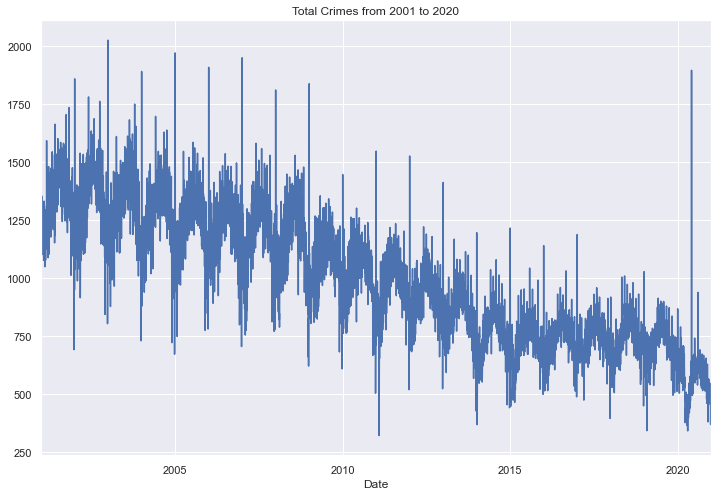

In [33]:
allcrimes_byday['Total Crimes'].plot(figsize=(12,8));
plt.title('Total Crimes from 2001 to 2020')